<a href="https://colab.research.google.com/github/ChiVladimir/pythonProject_2/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9C%D0%BE%D1%8F_%D0%BA%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Python_%D0%93%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

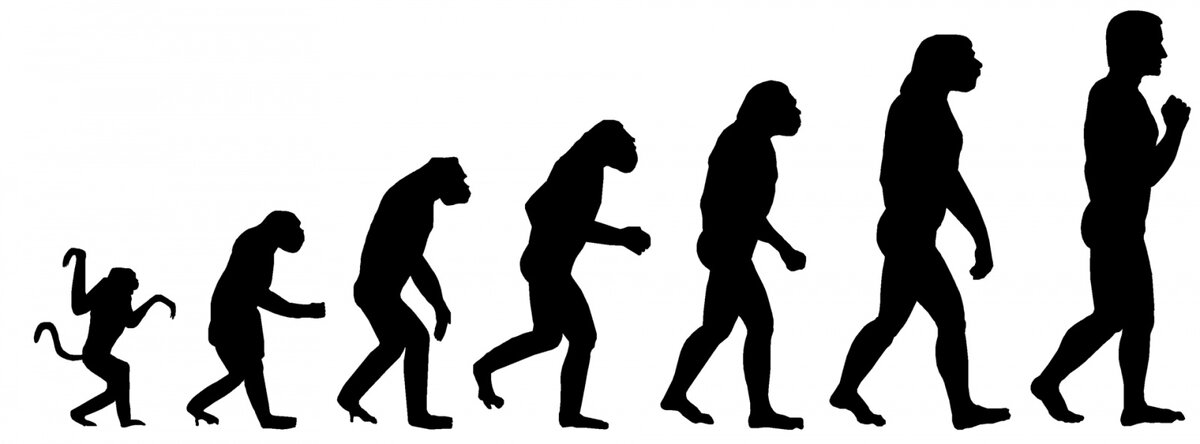

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Генетические алгоритмы

##Что такое генетический алгоритм?

Генетические алгоритмы — это тип алгоритма оптимизации и поиска, вдохновленный процессом естественного отбора в биологической эволюции.

Эти алгоритмы используют такие принципы, как мутация, скрещивание (или воспроизводство) и отбор для поиска решений сложных проблем.

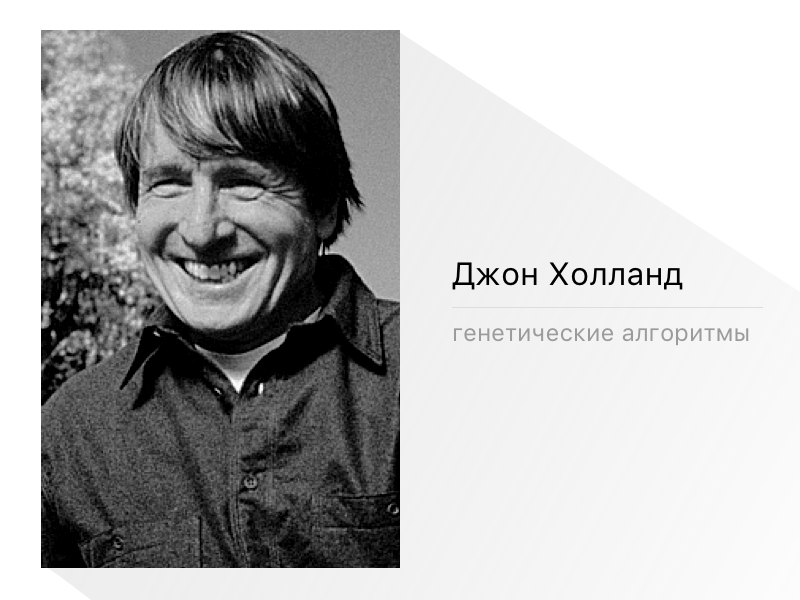

**Джон Генри Холланд** – американский ученый, профессор электротехники и информатики в Мичиганском университете. Наиболее известен как инноватор сложных адаптивных систем и нелинейной науки, а также создатель генетических алгоритмов.

Идею генетических алгоритмов он сформулировал и обосновал в конце 60-х-начале 70-х гг. ХХ в. Он заинтересовался свойствами процессов естественной эволюции, в том числе фактом, что эволюционируют хромосомы, а не сами существа. Ученый был уверен в возможности составить и реализовать в виде компьютерной программы алгоритм, который будет решать сложные задачи так, как это делает природа – путем эволюции. Поэтому он начал трудиться над алгоритмами, оперировавшими последовательностями двоичных цифр (единиц и нулей), получившими название хромосом.

Генетические алгоритмы работают по аналогии с природой. Они оперируют с совокупностью «особей», представляющих собой строки, каждая из которых кодирует одно из решений задачи. Приспособленность особи оценивается с помощью специальной функции. Наиболее приспособленные получают шанс скрещиваться и давать потомство. Наихудшие особи удаляются. Таким образом, приспособленность нового поколения в среднем выше предыдущего. На практике генетические алгоритмы используются для решения таких, задач, как оптимизация запросов в базах данных, настройка и обучение искусственной нейронной сети, составление игровых стратегий, создание искусственной жизни. Вышедшая в 1975 г. книга Джона Холланда «Адаптация в естественных и искусственных системах» [Adaptation in Natural and Artificial Systems] является основополагающим трудом в этой области исследований

##Population
Это относится к набору возможных решений (или хромосом) проблемы. На каждой итерации (или поколении) генетические алгоритмы работают с популяцией хромосом.

##Fitness Function
Эта функция измеряет качество или «пригодность» решения для популяции, направляя поиск оптимальных решений.

##Operators: Selection, Crossover, Mutation
Эти операторы имитируют естественные эволюционные процессы. Отбор выбирает подходящих особей, скрещивание объединяет два решения для создания новых, а мутация вносит в решение небольшие случайные изменения.

In [ ]:
import random

# Количество особей в каждом поколении
POPULATION_SIZE = 100

# Валидные гены
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Целевая строка для генерации
TARGET = "In principio erat Verbum"

class Individual(object):
	'''
	Класс, представляющий отдельную особь (индивида) в популяции
	'''
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		Создаем случайные гены для мутации
		'''
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		'''
		Создаем хромосому или набор генов
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def gene_transfer(self, par2):
		'''
		Передаем гены новому поколению индивидов
		'''

		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			prob = random.random()

			# если вероятность меньше 0,45, берем ген
			# от родителя 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# если вероятность между 0.45 и 0.90, берем
			# ген от родителя 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# в противном случае берем случайный ген (мутация),
			else:
				child_chromosome.append(self.mutated_genes())


		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Рассчитываем показатель соответствия, это количество
		символов в строке, которые отличаются от целевой
		строки.
		'''
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs != gt: fitness+= 1
		return fitness

# Driver code
def main():
	global POPULATION_SIZE

	#Текущее поколение
	generation = 1

	found = False
	population = []

	# Новое поколение
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()
				population.append(Individual(gnome))

	while not found:

		# Отсортируем популяцию в порядке возрастания оценки соответствия целевой функции
		population = sorted(population, key = lambda x:x.fitness)

		# Если у нас появился индивид, достигший целевой функции
		# цикл совершенствования можно прервать
		if population[0].fitness <= 0:
			found = True
			break

		# В противном случае - продолжаем создавать новые поколения
		new_generation = []

		# Определяем 10% популяции, наиболее соответствующих целевой фукнции
		# чтобы передать их гены будущим поколениям
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])


		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:50])
			parent2 = random.choice(population[:50])
			child = parent1.gene_transfer(parent2)
			new_generation.append(child)

		population = new_generation

		print("Generation: {}\tString: {}\tFitness: {}".
			format(generation,
			"".join(population[0].chromosome),
			population[0].fitness))

		generation += 1


	print("Generation: {}\tString: {}\tFitness: {}".
		format(generation,
		"".join(population[0].chromosome),
		population[0].fitness))

if __name__ == '__main__':
	main()


Generation: 1	String: Lbs?kexE?EcowEOa-dwf6lXO	Fitness: 22
Generation: 2	String: -bv?leWJcQco#Epa- wf69rO	Fitness: 21
Generation: 3	String: -bv?leWJcQco#Epa- wf69rO	Fitness: 21
Generation: 4	String: IT 1i;naaVTzIa1H]7VGii3P	Fitness: 20
Generation: 5	String: @b ?9eVtpXloIabalPVGr]e8	Fitness: 19
Generation: 6	String: IbAoviyU{OHd aSZ[ werQKO	Fitness: 18
Generation: 7	String: 1d%8mtnHgplo p&aEjV!Qbzy	Fitness: 17
Generation: 8	String: ]1X?r!nZtpmK R)al V4rge(	Fitness: 16
Generation: 9	String: Id%ovinHipTz aca[ Veiv[y	Fitness: 14
Generation: 10	String: Id%ovinHipTz aca[ Veiv[y	Fitness: 14
Generation: 11	String: Id%ovinHipTz aca[ Veiv[y	Fitness: 14
Generation: 12	String: Zd[MrinHipgo a.a[ Veivny	Fitness: 13
Generation: 13	String: IdAerinyipTd aSa- V!rb[y	Fitness: 12
Generation: 14	String: IbGerintipTd E6at V/rb[y	Fitness: 11
Generation: 15	String: IbGerintipTd E6at V/rb[y	Fitness: 11
Generation: 16	String: I  erin2iplo  .aH Xerbny	Fitness: 10
Generation: 17	String: I  erin2iplo  .aH Xerbny	F

#Зачем использовать генетические алгоритмы?
Генетические алгоритмы способны решать сложные, многомерные проблемы, одновременно просматривая большой пул возможных решений.

##Оптимальные результаты
Поскольку генетические алгоритмы основаны на принципе выживания наиболее приспособленных, они ориентированы на поиск оптимальных решений.

##Обрабатывает шум и неполные данные
Генетические алгоритмы могут обрабатывать зашумленные и неполные наборы данных, часто создавая приемлемые решения там, где другие методы могут оказаться неэффективными.

##Гибкий и адаптируемый
Эти алгоритмы являются гибкими и адаптируемыми, поскольку они не делают никаких предположений о проблемном пространстве и не зависят от проблемной области.



#Ограничения генетических алгоритмов
Генетические алгоритмы часто требуют точной настройки таких параметров, как частота мутаций, скорость скрещивания и размер популяции, чтобы получить оптимальные результаты.

##Нет гарантии оптимального решения
Хотя генетические алгоритмы хороши в поиске высококачественных решений, они не всегда гарантируют нахождение абсолютно лучшего решения.

##Неясное время конвергенции
Время сходимости, время, необходимое алгоритму для достижения оптимального или близкого к оптимальному решения, не является определенным и различается от проблемы к проблеме.

##Возможность преждевременной конвергенции
Генетические алгоритмы могут застрять на неоптимальных решениях — ситуация, известная как преждевременная сходимость.

#Сферы применения генетических алгоритмов

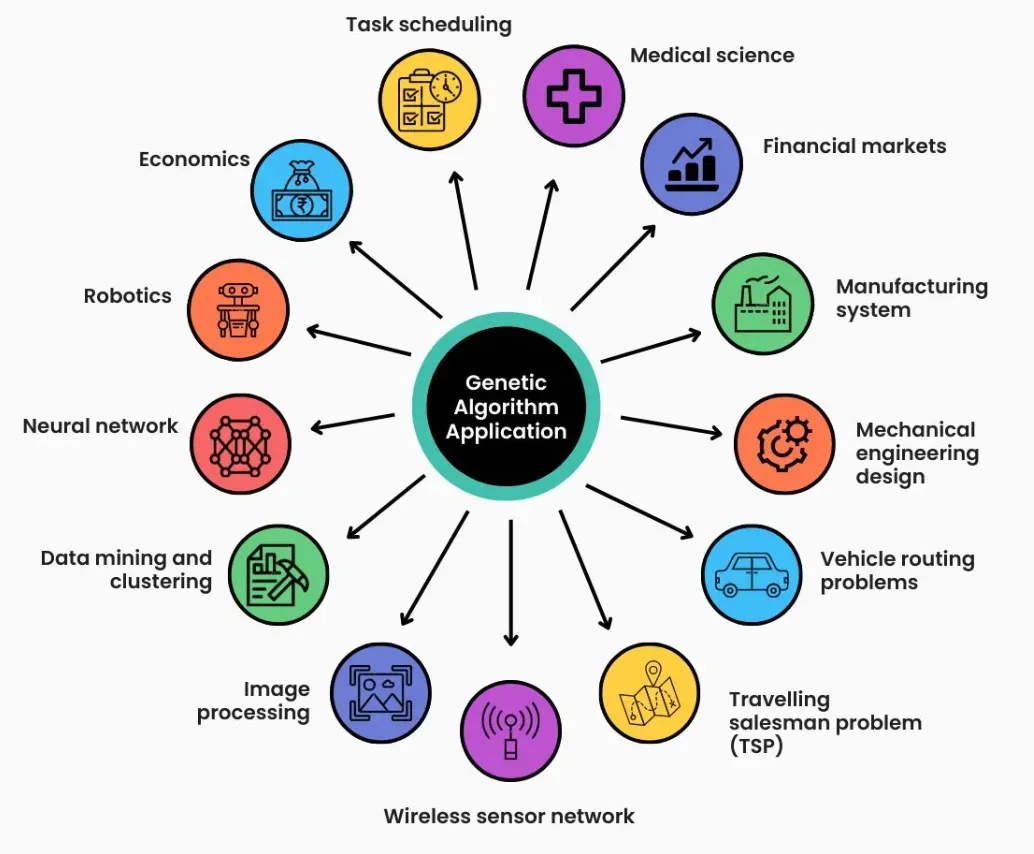

##Машинное обучение
Генетические алгоритмы используются в машинном обучении для оптимизации алгоритмов обучения , тем самым улучшая производительность модели.

##Распознавание изображений
При распознавании изображений генетические алгоритмы играют ключевую роль в выборе признаков, тем самым повышая точность распознавания.

##Инженерный дизайн
Генетические алгоритмы используются для оптимизации и предоставления надежных решений в инженерном проектировании. Способность быстро оценивать и генерировать потенциальные решения делает их ценными инструментами в этой области.

##Маршрутизация трафика и поставок
Генетические алгоритмы были приняты многими торговыми компаниями для эффективного решения проблем с движением транспорта и маршрутизацией грузов. Они помогают сэкономить время и деньги за счет поиска оптимальных маршрутов.

##Робототехника
Генетические алгоритмы играют важную роль в робототехнике. Их используют для создания обучающихся роботов, которые могут выполнять такие задачи, как приготовление еды или стирка. Имитируя процесс естественной эволюции, генетические алгоритмы помогают роботам вести себя больше как люди.